In [1]:
!python -V

Python 3.6.13


In [2]:
import pandas as pd

In [3]:
import pickle

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [6]:
df = pd.read_parquet('https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-01.parquet')

In [7]:
len(df)

1154112

In [8]:
df['duration'] = ((df['dropOff_datetime'] - df['pickup_datetime']).dt.total_seconds() / 60).round(0).astype(int)
df.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,17
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,17
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013,110
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,8
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,15


In [9]:
df['duration'].mean()

19.164924201463982

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='duration', ylabel='count'>

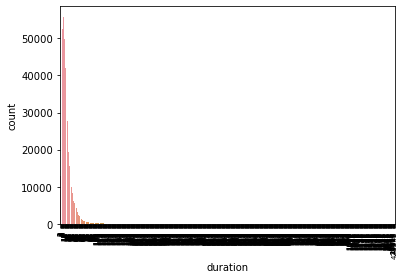

In [10]:
plt.xticks(rotation=90, size=7)
sns.countplot(df.duration)

In [11]:
before_drop = len(df)
df = df[(df['duration'] >= 1) & (df['duration'] <= 60)]
after_drop = len(df)
print('before drop: ', before_drop)
print('dropped: ', before_drop - after_drop)
print('after drop: ', after_drop)

before drop:  1154112
dropped:  40776
after drop:  1113336


/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='duration', ylabel='count'>

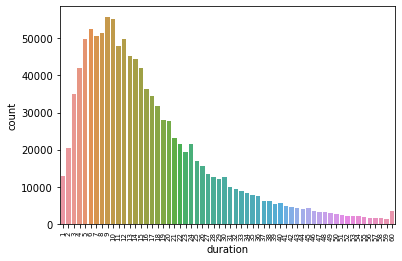

In [12]:
plt.xticks(rotation=90, size=7)
sns.countplot(df.duration)

In [13]:
df_backup = df.copy()

In [14]:
df = df_backup

In [15]:
df['PUlocationID'][df['PUlocationID'].isna()] = -1
df['DOlocationID'][df['DOlocationID'].isna()] = -1
df.head()

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,-1.0,-1.0,None,B00009,17
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,-1.0,-1.0,None,B00009,17
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,-1.0,72.0,None,B00037,8
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,-1.0,61.0,None,B00037,15
5,B00037,2021-01-01 00:59:02,2021-01-01 01:08:05,-1.0,71.0,None,B00037,9


In [16]:
(df['PUlocationID'] == -1).sum() / len(df)

0.8350426106763816

In [17]:
features = df[['PUlocationID', 'DOlocationID']].astype('int')
features.head()

,PUlocationID,DOlocationID
0,-1,-1
1,-1,-1
3,-1,72
4,-1,61
5,-1,71


In [18]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(features)
X_train = enc.transform(features).toarray()
X_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [19]:
X_train.shape

(1113336, 525)

In [20]:
y_train = df['duration'].values
y_train

array([17, 17,  8, ..., 16, 19, 36])

In [21]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = lr.predict(X_train)
mean_squared_error(y_train, y_pred, squared=False)

10.591649948036874

In [23]:
df_val = pd.read_parquet('https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-02.parquet')

In [24]:
df_val['duration'] = ((df_val['dropOff_datetime'] - df_val['pickup_datetime']).dt.total_seconds() / 60).round(0).astype(int)
df_val = df_val[(df_val['duration'] >= 1) & (df_val['duration'] <= 60)]
df_val['PUlocationID'][df_val['PUlocationID'].isna()] = -1
df_val['DOlocationID'][df_val['DOlocationID'].isna()] = -1
val_features = df_val[['PUlocationID', 'DOlocationID']].astype('int')
X_val = enc.transform(val_features).toarray()
y_val = df_val['duration'].values

In [25]:
X_val, y_val

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([11, 15,  8, ..., 25, 18, 16]))

In [26]:
y_pred = lr.predict(X_val)
mean_squared_error(y_val, y_pred, squared=False)

11.085468981936017